# **VitDet Backbone Class**

In [1]:
import tensorflow as tf
import keras_cv.models
from tensorflow.keras.utils import plot_model
import IPython.display as display
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorflow.keras.models import Model

2024-08-07 00:23:42.338625: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-07 00:23:42.339168: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-07 00:23:42.341732: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-07 00:23:42.349236: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 00:23:42.361982: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
# Load architecture and weights from preset
model = keras_cv.models.ViTDetBackbone.from_preset(
    "vitdet_base_sa1b",
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 845/845 [00:00<00:00, 2.17MB/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 342M/342M [00:26<00:00, 13.3MB/s]


In [3]:
model.summary()

Model: "vi_t_det_backbone"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ images (InputLayer)             │ (None, 1024, 1024, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 1024, 1024, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 1024, 1024, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 1024, 1024, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vi_t_det_patching_and_embedding │ (None, 64, 64, 768)    │       590,592 │
│ (ViTDetPatchingAndEmbedding)    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ add_positional_embedding        │ (None, 64, 64, 768)    │     3,145,728 │
│ (AddPositionalEmbedding)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ windowed_transformer_encoder    │ (None, 64, 64, 768)    │     7,091,328 │
│ (WindowedTransformerEncoder)    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ windowed_transformer_encoder_1  │ (None, 64, 64, 768)    │     7,091,328 │
│ (WindowedTransformerEncoder)    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ windowed_transformer_encoder_2  │ (None, 64, 64, 768)    │     7,104,128 │
│ (WindowedTransformerEncoder)    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ windowed_transformer_encoder_3  │ (None, 64, 64, 768)    │     7,091,328 │
│ (WindowedTransformerEncoder)    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ windowed_transformer_encoder_4  │ (None, 64, 64, 768)    │     7,091,328 │
│ (WindowedTransformerEncoder)    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ windowed_transformer_encoder_5  │ (None, 64, 64, 768)    │     7,104,128 │
│ (WindowedTransformerEncoder)    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ windowed_transformer_encoder_6  │ (None, 64, 64, 768)    │     7,091,328 │
│ (WindowedTransformerEncoder)    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ windowed_transformer_encoder_7  │ (None, 64, 64, 768)    │     7,091,328 │
│ (WindowedTransformerEncoder)    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ windowed_transformer_encoder_8  │ (None, 64, 64, 768)    │     7,104,128 │
│ (WindowedTransformerEncoder)    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ windowed_transformer_encoder_9  │ (None, 64, 64, 768)    │     7,091,328 │
│ (WindowedTransformerEncoder)    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ windowed_transformer_encoder_10 │ (None, 64, 64, 768)    │     7,091,328 │
│ (WindowedTransformerEncoder)    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ windowed_transformer_encoder_11 │ (None, 64, 64, 768)    │     7,104,128 │
│ (WindowedTransformerEncoder)    │                        │             

 Total params: 89,670,912 (342.07 MB)

 Trainable params: 89,670,912 (342.07 MB)

 Non-trainable params: 0 (0.00 B)

## **Inference on High resolution image with small objects** 
(3000x3000 px vs an avg object of 200x200 px)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


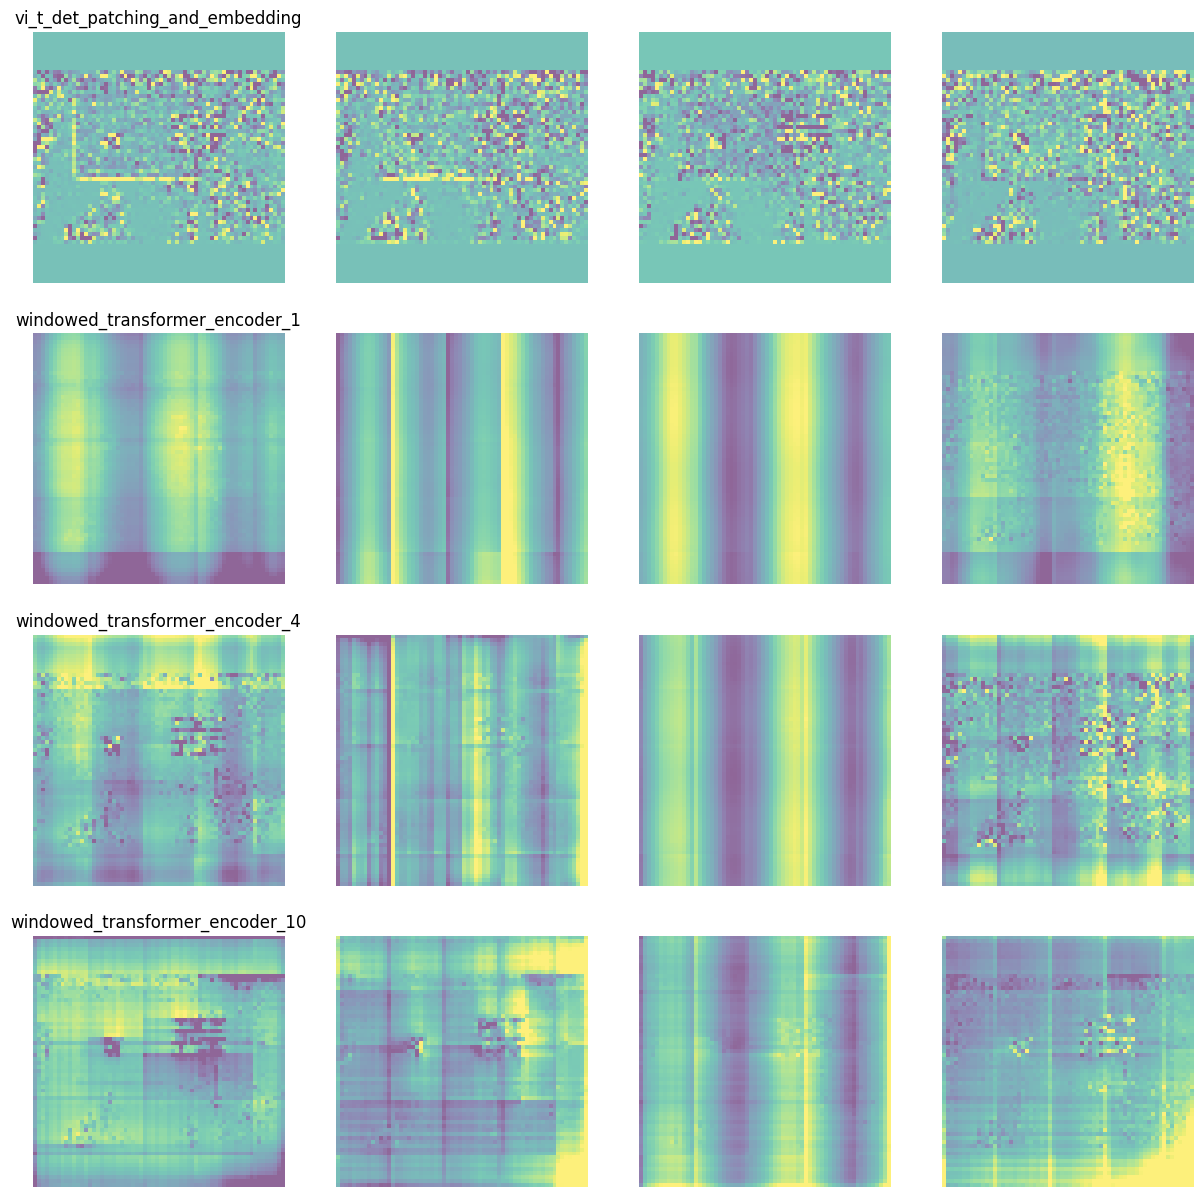

In [6]:
def load_image(img_path, target_size=(1024, 1024)):
    img = Image.open(img_path).convert('RGB')  # Convert to RGB to ensure 3 channels
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

image_path = 'data/illustrator_4.jpg'  # Replace with your image path
input_image = load_image(image_path)


# Pass the image through the model
features = model(input_image)

# Create a model that gives outputs of all intermediate layers
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Get the activations for the input image
activations = activation_model.predict(input_image)

def display_activation_maps(activations, input_img, layer_names, n_cols=4):
    n_rows = len(activations)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
    
    for i, (activation, layer_name) in enumerate(zip(activations, layer_names)):
        num_filters = activation.shape[-1]
        for col in range(n_cols):
            filter_index = col
            if filter_index < num_filters:
                activation_img = activation[0, :, :, filter_index]
                activation_img -= activation_img.mean()
                activation_img /= activation_img.std()
                activation_img *= 64
                activation_img += 128
                activation_img = np.clip(activation_img, 0, 255).astype('uint8')
                
                ax = axes[i, col]
                ax.imshow(input_img)
                ax.imshow(activation_img, cmap='viridis', alpha=0.6)
                ax.axis('off')
                
        # Set layer name as the title for the first column of each row
        axes[i, 0].set_title(layer_name)
    
    plt.show()

# intermediate outputs
layer_names = ['vi_t_det_patching_and_embedding', 'windowed_transformer_encoder_1', 'windowed_transformer_encoder_4', 'windowed_transformer_encoder_10']  # Filter for convolutional layers
intermediate_model = Model(inputs=model.input, outputs=[model.get_layer(name).output for name in layer_names])

# Get the activations for the input image
activations = intermediate_model.predict(input_image)

# Visualize the activation maps
input_img = np.array(Image.open(image_path).resize((1024, 1024)))
display_activation_maps(activations, input_img, layer_names)

In [8]:
model = keras_cv.models.ViTDetBBackbone(
    input_shape=(3000, 3000, 3),
    input_tensor=None,
    patch_size=16,
    embed_dim=768,
    depth=12,
    mlp_dim=3072,
    num_heads=12,
    out_chans=256,
    use_bias=True,
    use_abs_pos=True,
    use_rel_pos=True,
    window_size=14,
    global_attention_indices=[2, 5, 8, 11],
    layer_norm_epsilon=1e-06
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 831/831 [00:00<00:00, 2.33MB/s]


In [9]:
def load_image(img_path, target_size=(3000, 3000)):
    img = Image.open(img_path).convert('RGB')  # Convert to RGB to ensure 3 channels
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

image_path = 'data/illustrator_4.jpg'  # Replace with your image path
input_image = load_image(image_path)


# Pass the image through the model
features = model(input_image)

# Create a model that gives outputs of all intermediate layers
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Get the activations for the input image
activations = activation_model.predict(input_image)

def display_activation_maps(activations, input_img, layer_names, n_cols=4):
    n_rows = len(activations)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
    
    for i, (activation, layer_name) in enumerate(zip(activations, layer_names)):
        num_filters = activation.shape[-1]
        for col in range(n_cols):
            filter_index = col
            if filter_index < num_filters:
                activation_img = activation[0, :, :, filter_index]
                activation_img -= activation_img.mean()
                activation_img /= activation_img.std()
                activation_img *= 64
                activation_img += 128
                activation_img = np.clip(activation_img, 0, 255).astype('uint8')
                
                ax = axes[i, col]
                ax.imshow(input_img)
                ax.imshow(activation_img, cmap='viridis', alpha=0.6)
                ax.axis('off')
                
        # Set layer name as the title for the first column of each row
        axes[i, 0].set_title(layer_name)
    
    plt.show()

# intermediate outputs
layer_names = ['vi_t_det_patching_and_embedding', 'windowed_transformer_encoder_1', 'windowed_transformer_encoder_4', 'windowed_transformer_encoder_10']  # Filter for convolutional layers
intermediate_model = Model(inputs=model.input, outputs=[model.get_layer(name).output for name in layer_names])

# Get the activations for the input image
activations = intermediate_model.predict(input_image)

# Visualize the activation maps
input_img = np.array(Image.open(image_path).resize((3000, 3000)))
display_activation_maps(activations, input_img, layer_names)

2024-08-07 00:31:37.385675: W external/local_tsl/tsl/framework/bfc_allocator.cc:482] Allocator (mklcpu) ran out of memory trying to allocate 54.66GiB (rounded to 58695886336)requested by op _MklBatchMatMulV2
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2024-08-07 00:31:37.385765: I external/local_tsl/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for mklcpu
2024-08-07 00:31:37.385802: I external/local_tsl/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2024-08-07 00:31:37.385806: I external/local_tsl/tsl/framework/bfc_allocator.cc:1046] Bin (512): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2024-08-07 00:31:37.385808: I external/local_tsl/

ResourceExhaustedError: Exception encountered when calling MultiHeadAttentionWithRelativePE.call().

[1m{{function_node __wrapped____MklBatchMatMulV2_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[12,34969,34969] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu [Op:BatchMatMulV2] name: [0m

Arguments received by MultiHeadAttentionWithRelativePE.call():
  • x=tf.Tensor(shape=(1, 187, 187, 768), dtype=float32)